In [8]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

train_df = pd.read_csv("spam_messages_train.csv")
test_df  = pd.read_csv("spam_messages_test.csv")

train_df.head()

,label,text
0,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
1,ham,I sent my scores to sophas and i had to do sec...
2,spam,We know someone who you know that fancies you....
3,ham,Only if you promise your getting out as SOON a...
4,spam,Congratulations ur awarded either �500 of CD g...


In [16]:
x_train_text = train_df["text"]
y_train = train_df["label"]

x_test_text = test_df["text"]
y_test = test_df["label"]

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")

x_train = vectorizer.fit_transform(x_train_text)
x_test  = vectorizer.transform(x_test_text)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
model.fit(x_train, y_train)

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.94      0.97      0.96      3595
        spam       0.95      0.91      0.93      2331

    accuracy                           0.95      5926
   macro avg       0.95      0.94      0.94      5926
weighted avg       0.95      0.95      0.95      5926



In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.95      0.96      0.96      3595
        spam       0.94      0.93      0.94      2331

    accuracy                           0.95      5926
   macro avg       0.95      0.95      0.95      5926
weighted avg       0.95      0.95      0.95      5926



In [38]:
sample = ["Hello I am Ram. I was you friend back in school"]

sample_vec = vectorizer.transform(sample)
model.predict(sample_vec)

array(['ham'], dtype=object)

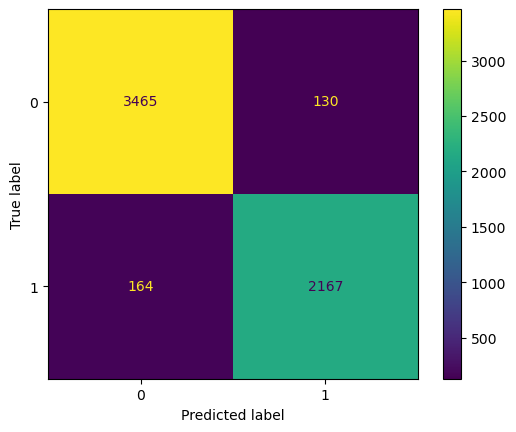

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(x_test))).plot()
plt.show()